# sentiment analysis for disney land reviews 

# EDA

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('disney_reviews.csv')
df.head()

,rating,review
0,4,If you've ever been to Disneyland anywhere you...
1,4,Its been a while since d last time we visit HK...
2,4,Thanks God it wasn t too hot or too humid wh...
3,4,HK Disneyland is a great compact park. Unfortu...
4,4,"the location is not in the city, took around 1..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  42656 non-null  int64 
 1   review  42656 non-null  object
dtypes: int64(1), object(1)
memory usage: 666.6+ KB


<Axes: ylabel='rating'>

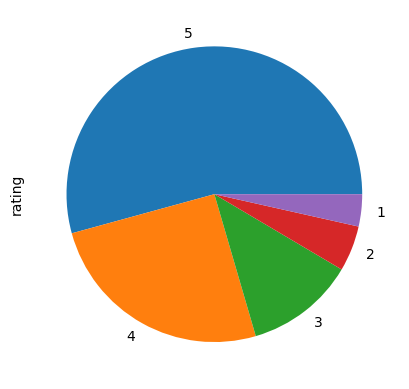

In [4]:
rates_ratio = df['rating'].value_counts()
rates_ratio.plot(kind='pie')


# text preprocessing 1

In [5]:
import nltk 
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [6]:
stopwords = set(stopwords.words('english'))
docs = []
for i in range(len(df['review'])):
    doc = re.sub('[^a-zA-Z]', ' ', df['review'][i]).lower()
    doc = word_tokenize(doc) 
    lowered_doc = [voc.lower() for voc in doc ]
    stopped_doc = [voc for voc in lowered_doc if voc not in stopwords ]
    lemmatized_doc = [lemmatizer.lemmatize(voc) for voc in stopped_doc]
    done_doc = ' '.join(lemmatized_doc)
    docs.append(done_doc)
docs

['ever disneyland anywhere find disneyland hong kong similar layout walk main street familiar feel one ride small world absolutely fabulous worth day visited fairly hot relatively busy queue moved fairly well',
 'since last time visit hk disneyland yet time stay tomorrowland aka marvel land iron man experience n newly open ant man n wasp ironman great feature n exciting especially whole scenery hk hk central area kowloon antman changed previous buzz lightyear le expecting something however boy like space mountain turn star war great cast member staff felt bit minus point dun feel like disney brand seems local like ocean park even worst got smiling face wan na u enter n attraction n leave hello supposed happiest place earth brand really dont feel bakery main street attractive delicacy n disney theme sweet good point last also starbucks inside theme park',
 'thanks god hot humid visiting park otherwise would big issue lot shade arrived around left pm unfortunately last evening parade hou

In [7]:
# extract and normalize each word in each sentence
vocs = []
for doc in docs:
    vocs.append(word_tokenize(doc)) 
vocs 

[['ever',
  'disneyland',
  'anywhere',
  'find',
  'disneyland',
  'hong',
  'kong',
  'similar',
  'layout',
  'walk',
  'main',
  'street',
  'familiar',
  'feel',
  'one',
  'ride',
  'small',
  'world',
  'absolutely',
  'fabulous',
  'worth',
  'day',
  'visited',
  'fairly',
  'hot',
  'relatively',
  'busy',
  'queue',
  'moved',
  'fairly',
  'well'],
 ['since',
  'last',
  'time',
  'visit',
  'hk',
  'disneyland',
  'yet',
  'time',
  'stay',
  'tomorrowland',
  'aka',
  'marvel',
  'land',
  'iron',
  'man',
  'experience',
  'n',
  'newly',
  'open',
  'ant',
  'man',
  'n',
  'wasp',
  'ironman',
  'great',
  'feature',
  'n',
  'exciting',
  'especially',
  'whole',
  'scenery',
  'hk',
  'hk',
  'central',
  'area',
  'kowloon',
  'antman',
  'changed',
  'previous',
  'buzz',
  'lightyear',
  'le',
  'expecting',
  'something',
  'however',
  'boy',
  'like',
  'space',
  'mountain',
  'turn',
  'star',
  'war',
  'great',
  'cast',
  'member',
  'staff',
  'felt',
  '

In [8]:
len(vocs)

42656

# text preprocessing 2
### word embedding & text vectorization (training Word2Vec model )

In [9]:
from gensim.models import Word2Vec

In [10]:
w2v = Word2Vec(vocs, window = 3 , min_count = 1)


In [11]:
w2v.wv.index_to_key , len(w2v.wv.index_to_key)

(['park',
  'ride',
  'time',
  'day',
  'disney',
  'disneyland',
  'get',
  'one',
  'go',
  'great',
  'kid',
  'place',
  'food',
  'would',
  'line',
  'year',
  'good',
  'show',
  'queue',
  'visit',
  'really',
  'like',
  'parade',
  'see',
  'went',
  'much',
  'people',
  'u',
  'child',
  'lot',
  'also',
  'wait',
  'long',
  'hour',
  'back',
  'fast',
  'fun',
  'character',
  'pas',
  'experience',
  'even',
  'attraction',
  'first',
  'many',
  'around',
  'ticket',
  'take',
  'well',
  'minute',
  'world',
  'hotel',
  'family',
  'staff',
  'still',
  'firework',
  'make',
  'mountain',
  'thing',
  'got',
  'old',
  'paris',
  'could',
  'worth',
  'going',
  'small',
  'little',
  'trip',
  'best',
  'two',
  'expensive',
  'loved',
  'every',
  'love',
  'amazing',
  'way',
  'everything',
  'better',
  'need',
  'magic',
  'night',
  'big',
  'early',
  'always',
  'crowd',
  'closed',
  'california',
  'visited',
  'want',
  'magical',
  'enjoyed',
  'restaura

In [12]:
w2v.corpus_count

42656

In [13]:
w2v.epochs

5

In [14]:
w2v.wv.similar_by_word('child')

[('kid', 0.9085026383399963),
 ('toddler', 0.706103503704071),
 ('teenager', 0.7028889060020447),
 ('teen', 0.6128920912742615),
 ('son', 0.5967053174972534),
 ('daughter', 0.5966716408729553),
 ('parent', 0.5774465799331665),
 ('boy', 0.5679843425750732),
 ('girl', 0.5566456913948059),
 ('alike', 0.5501574277877808)]

In [15]:
w2v.wv.similarity('girl' , 'child')

0.55664575

# average word2vec 
   for representing documents as a single vector :
- reduce the dimensionality of the data.
- improve the performance of the machine learning model

# training model classification model 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

w2v_model = w2v

x = df['review'][:1000]
y = df['rating'][:1000]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Compute the document embeddings for the training and test sets (average word2vec)
X_train_embeddings = np.array([np.mean([w2v_model.wv.get_vector(word) for word in doc.split() if word in w2v_model.wv.index_to_key], axis=0) for doc in X_train])
X_test_embeddings = np.array([np.mean([w2v_model.wv.get_vector(word) for word in doc.split() if word in w2v_model.wv.index_to_key], axis=0) for doc in X_test])

# Reshape the document embeddings
X_train_embeddings = X_train_embeddings.reshape(-1, w2v_model.vector_size)
X_test_embeddings = X_test_embeddings.reshape(-1, w2v_model.vector_size)

clf = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
clf.fit(X_train_embeddings, y_train)

# Evaluate the model 
accuracy = clf.score(X_test_embeddings, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.515


C:\Users\kamel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.svm import SVC

w2v_model = w2v

x = df['review'][:1000]
y = df['rating'][:1000]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Compute the document embeddings for the training and test sets (average word2vec)
X_train_embeddings = np.array([np.mean([w2v_model.wv.get_vector(word) for word in doc.split() if word in w2v_model.wv.index_to_key], axis=0) for doc in X_train])
X_test_embeddings = np.array([np.mean([w2v_model.wv.get_vector(word) for word in doc.split() if word in w2v_model.wv.index_to_key], axis=0) for doc in X_test])

# Reshape the document embeddings
X_train_embeddings = X_train_embeddings.reshape(-1, w2v_model.vector_size)
X_test_embeddings = X_test_embeddings.reshape(-1, w2v_model.vector_size)

clf = SVC(random_state=42)
clf.fit(X_train_embeddings, y_train)

# Evaluate the model 
accuracy = clf.score(X_test_embeddings, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.55
